# Import Library

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Heart Disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data preprocessing

In [4]:
df.shape

(1888, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1286

In [7]:
df.rename(columns={
    "age": "Age",
    "sex": "Sex",
    "cp": "ChestPainType",
    "trestbps": "RestingBloodPressure",
    "chol": "Cholesterol",
    "fbs": "FastingBloodSugar",
    "restecg": "RestingECG",
    "thalachh": "MaxHeartRateAchieved",
    "exang": "ExerciseInducedAngina",
    "oldpeak": "ST_Depression",
    "slope": "ST_Slope",
    "ca": "MajorVessels",
    "thal": "Thalassemia",
    "target": "HeartDisease"
}, inplace=True)

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

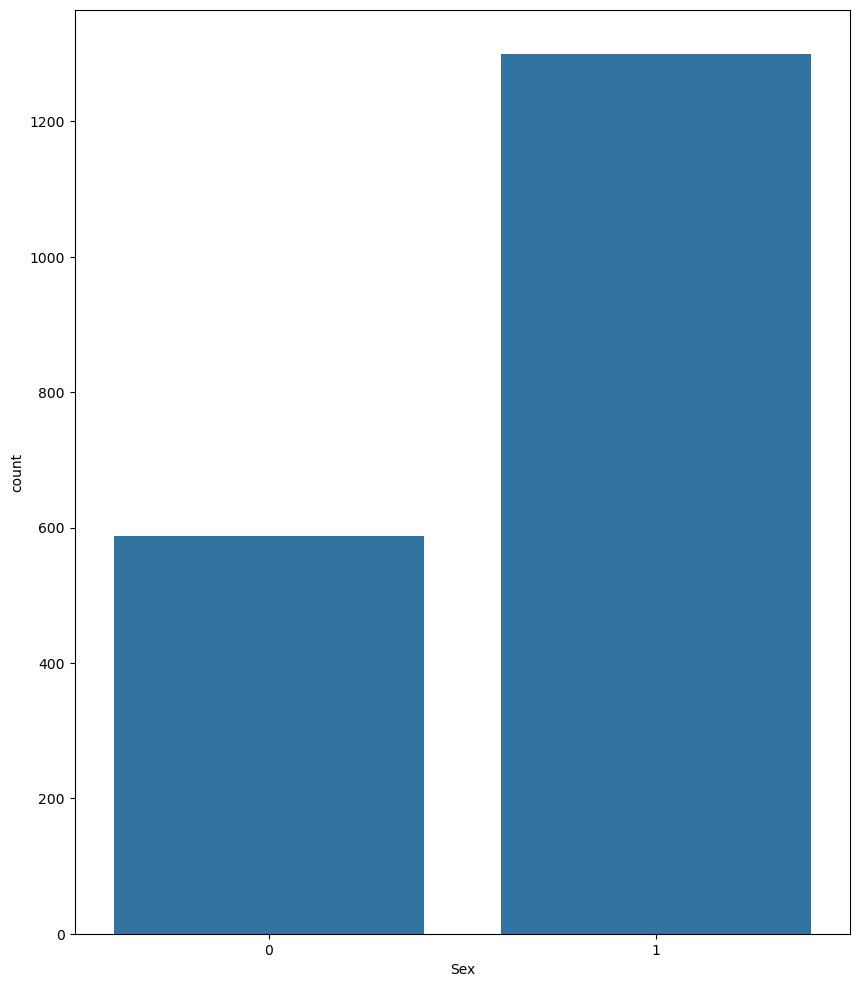

In [10]:
#(0 = Female, 1 = Male)
plt.figure(figsize=(10,12))
sns.countplot(x=df['Sex'])

In [11]:
df['Sex'].value_counts()

Sex
1    1300
0     588
Name: count, dtype: int64

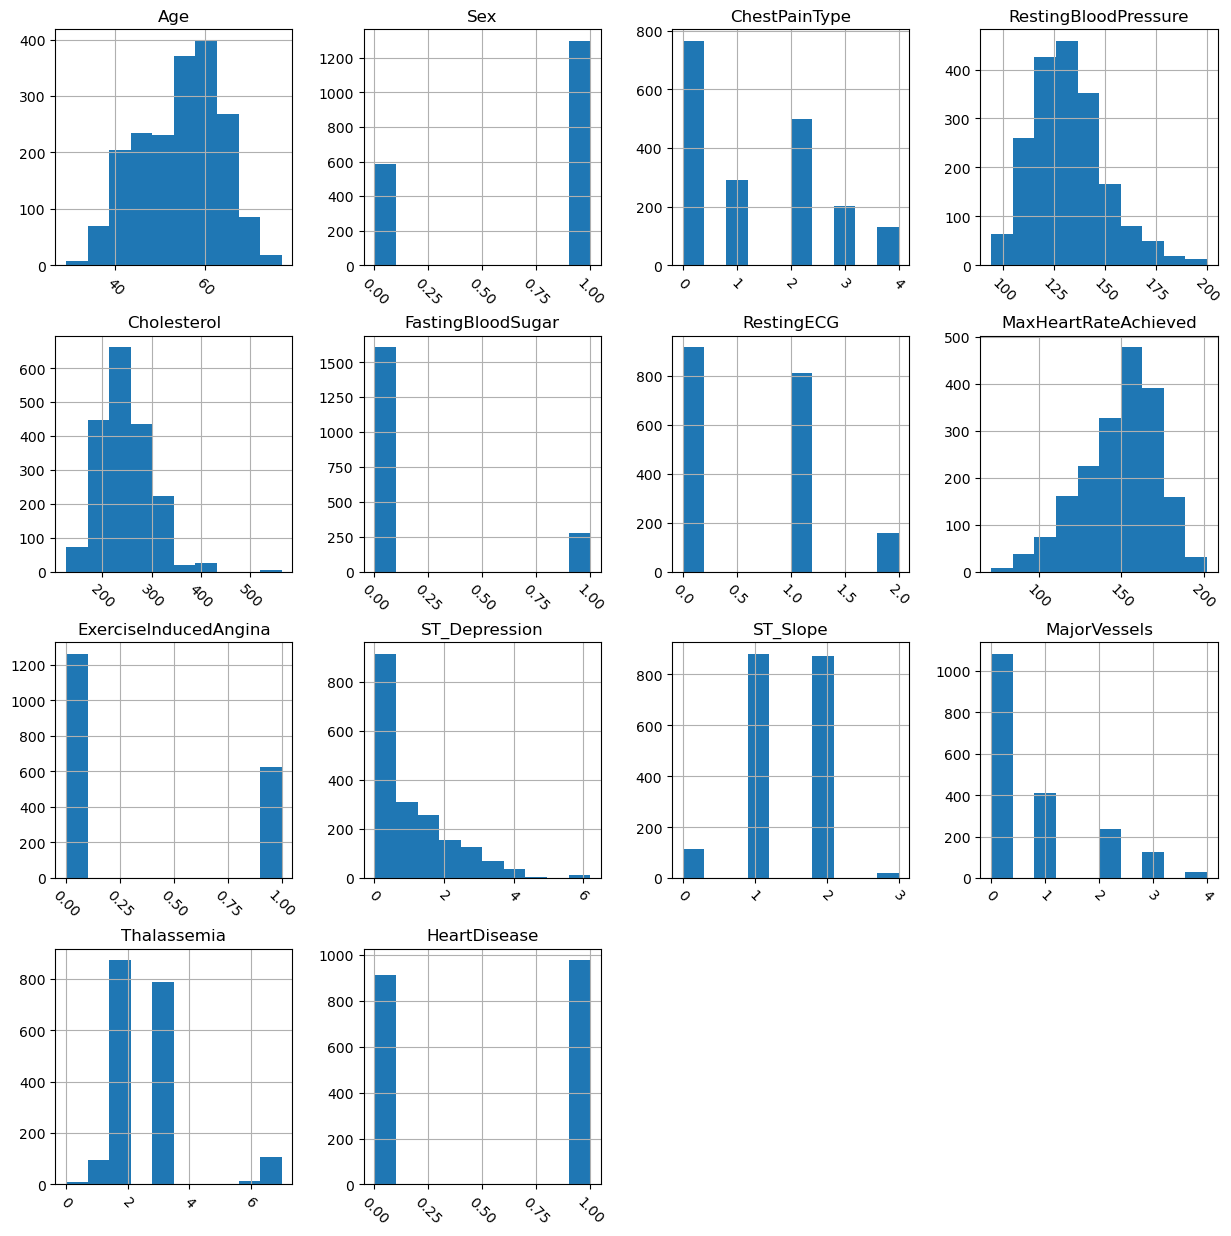

In [12]:
df.hist(figsize=(15,15),xrot=-45,bins=10)
plt.show()

In [13]:
df.describe()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [14]:
df.corr()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
Age,1.000000,-0.104266,-0.036207,0.271607,0.221379,0.119464,-0.059987,-0.392916,0.092343,0.205371,-0.121312,0.283840,0.053396,-0.162303
Sex,-0.104266,1.000000,-0.032933,-0.068685,-0.198892,0.032837,-0.031690,-0.053983,0.145680,0.092515,-0.020484,0.104863,0.168063,-0.196214
ChestPainType,-0.036207,-0.032933,1.000000,0.025887,-0.037596,0.052189,0.200863,0.171463,-0.231718,-0.094668,0.164810,-0.110988,0.392841,0.304025
RestingBloodPressure,0.271607,-0.068685,0.025887,1.000000,0.136976,0.171784,-0.056821,-0.041222,0.067186,0.196181,-0.084387,0.098762,0.054935,-0.095875
Cholesterol,0.221379,-0.198892,-0.037596,0.136976,1.000000,0.024681,-0.062365,-0.021208,0.073496,0.058111,-0.009180,0.080456,0.063576,-0.071589
FastingBloodSugar,0.119464,0.032837,0.052189,0.171784,0.024681,1.000000,-0.054344,-0.000829,0.035332,0.000702,-0.045836,0.132365,-0.004210,-0.032491
RestingECG,-0.059987,-0.031690,0.200863,-0.056821,-0.062365,-0.054344,1.000000,0.021038,-0.029963,-0.016102,0.131779,-0.038458,0.174936,0.123289
MaxHeartRateAchieved,-0.392916,-0.053983,0.171463,-0.041222,-0.021208,-0.000829,0.021038,1.000000,-0.381478,-0.349612,0.277653,-0.215914,-0.100009,0.298795
ExerciseInducedAngina,0.092343,0.145680,-0.231718,0.067186,0.073496,0.035332,-0.029963,-0.381478,1.000000,0.299862,-0.188768,0.117558,0.158651,-0.315084
ST_Depression,0.205371,0.092515,-0.094668,0.196181,0.058111,0.000702,-0.016102,-0.349612,0.299862,1.000000,-0.408819,0.221370,0.160869,-0.315629


In [15]:
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease             1.000000
ST_Slope                 0.333837
ChestPainType            0.304025
MaxHeartRateAchieved     0.298795
RestingECG               0.123289
FastingBloodSugar       -0.032491
Thalassemia             -0.067322
Cholesterol             -0.071589
RestingBloodPressure    -0.095875
Age                     -0.162303
Sex                     -0.196214
MajorVessels            -0.273105
ExerciseInducedAngina   -0.315084
ST_Depression           -0.315629
Name: HeartDisease, dtype: float64

In [16]:
#(1 = Yes, 0 = No)
df['HeartDisease'].value_counts()

HeartDisease
1    977
0    911
Name: count, dtype: int64

# Data spliting

In [17]:
x=df.drop('HeartDisease',axis=1).values
y=df['HeartDisease'].values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1264, 13), (1264,), (624, 13), (624,))

In [21]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
model1=LogisticRegression()
model1.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
from sklearn.metrics import r2_score,f1_score,recall_score,precision_score,confusion_matrix,accuracy_score

In [24]:
y_pred1=model1.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.7419871794871795
Precision: 0.7018970189701897
Recall: 0.8354838709677419
F1 Score: 0.7628865979381443

Confusion Matrix:
[[204 110]
 [ 51 259]]


In [25]:
from sklearn.svm import SVC

In [26]:
model2=SVC()
model2.fit(X_train_scaled,y_train)

y_pred2=model2.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.8910256410256411
Precision: 0.8805031446540881
Recall: 0.9032258064516129
F1 Score: 0.89171974522293

Confusion Matrix:
[[276  38]
 [ 30 280]]


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model3=DecisionTreeClassifier()
model3.fit(X_train_scaled,y_train)

y_pred3=model3.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.9519230769230769
Precision: 0.9487179487179487
Recall: 0.9548387096774194
F1 Score: 0.9517684887459807

Confusion Matrix:
[[298  16]
 [ 14 296]]


In [29]:
model4=RandomForestClassifier()
model4.fit(X_train_scaled, y_train)
y_pred4=model4.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
conf_matrix = confusion_matrix(y_test, y_pred4)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.969551282051282
Precision: 0.9678456591639871
Recall: 0.9709677419354839
F1 Score: 0.9694041867954911

Confusion Matrix:
[[304  10]
 [  9 301]]


In [30]:
model5=GradientBoostingClassifier()
model5.fit(X_train_scaled, y_train)
y_pred5=model5.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred5)
precision = precision_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
conf_matrix = confusion_matrix(y_test, y_pred5)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.8958333333333334
Precision: 0.881619937694704
Recall: 0.9129032258064517
F1 Score: 0.8969889064976229

Confusion Matrix:
[[276  38]
 [ 27 283]]


In [31]:
model6=KNeighborsClassifier()
model6.fit(X_train_scaled, y_train)
y_pred6=model6.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred6)
precision = precision_score(y_test, y_pred6)
recall = recall_score(y_test, y_pred6)
f1 = f1_score(y_test, y_pred6)
conf_matrix = confusion_matrix(y_test, y_pred6)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.8782051282051282
Precision: 0.8545454545454545
Recall: 0.9096774193548387
F1 Score: 0.88125

Confusion Matrix:
[[266  48]
 [ 28 282]]


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [33]:
best_params = {
    'max_depth': None,
    'max_features': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

# Train the model
model= RandomForestClassifier(**best_params)
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.9615384615384616
Precision: 0.949685534591195
Recall: 0.9741935483870968
F1 Score: 0.9617834394904459

Confusion Matrix:
[[298  16]
 [  8 302]]


In [34]:
rfc_heart=RandomForestClassifier()
rfc_heart.fit(X_train_scaled, y_train)
y_pred_rfc=rfc_heart.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.9615384615384616
Precision: 0.946875
Recall: 0.9774193548387097
F1 Score: 0.9619047619047619

Confusion Matrix:
[[297  17]
 [  7 303]]


In [35]:
def prediction(Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia):
    features = pd.DataFrame({
        'Age': [Age],
        'Sex': [Sex],
        'ChestPainType': [ChestPainType],
        'RestingBloodPressure': [RestingBloodPressure],
        'Cholesterol': [Cholesterol],
        'FastingBloodSugar': [FastingBloodSugar],
        'RestingECG': [RestingECG],
        'MaxHeartRateAchieved':[MaxHeartRateAchieved],
        'ExerciseInducedAngina': [ExerciseInducedAngina],
        'ST_Depression': [ST_Depression],
        'ST_Slope': [ST_Slope],
        'MajorVessels': [MajorVessels],
        'Thalassemia': [Thalassemia]
    }).values
    scaled_features=scaler.transform(features)
    predicted_value=rfc_heart.predict(scaled_features).reshape(1,-1)
    return predicted_value[0][0]

In [36]:
Age=65
Sex=0
ChestPainType=3	
RestingBloodPressure=160	
Cholesterol=360	
FastingBloodSugar=0	
RestingECG=2	
MaxHeartRateAchieved=151	
ExerciseInducedAngina=0	
ST_Depression=0.8	
ST_Slope=1	
MajorVessels=0	
Thalassemia=3
result=prediction(Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia)

In [37]:
result

0

# Deployment

In [38]:
import joblib

# Save the model
joblib.dump(rfc_heart, 'rfc_heart_model.joblib')  # Replace 'model.pkl' with a descriptive name
print("Model saved as 'rfc_heart_model.joblib'.")

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved as 'scaler.joblib'.")


Model saved as 'rfc_heart_model.joblib'.
Scaler saved as 'scaler.joblib'.
